<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicios de Regresión

Ejemplo de regresión utilizando el dataset recolecado de pesos y estaturas de personas<br>

[Dataset source](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
if os.access('weight_height.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv > weight_height.csv
    else:
        !wget weight_height.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv

--2024-03-08 19:09:00--  http://weight_height.csv/
Resolving weight_height.csv (weight_height.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘weight_height.csv’
--2024-03-08 19:09:00--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428122 (418K) [text/plain]
Saving to: ‘weight_height.csv’

weight_height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.04s   

2024-03-08 19:09:01 (11.3 MB/s) - ‘weight_height.csv’ saved [428122/428122]

FINISHED --2024-03-08 19:09:01--
Total wall clock time: 0.3s
Downloaded: 1 files, 418K in 0.04s (11.3 MB/s)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [4]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes

df = pd.read_csv("weight_height.csv")
des =df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699
Nan,0.000000,0.000000
%Nan,0.000000,0.000000


In [5]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes

df1 = df.copy()
df1.dropna(subset=["Height"], inplace=True)
df1.dropna(subset=["Weight"], inplace=True)
des =df1.describe()
des.loc['Nan'] = df1.isna().sum()
des.loc['%Nan'] = (df1.isna().mean())*100
des

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699
Nan,0.000000,0.000000
%Nan,0.000000,0.000000


In [6]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas

df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [7]:
# Alumno: copie los datos a un nuevo dataset (df2), pero ahora transforme las columnas en
# peso --> proveniente de Weight, debe pasar de libras a kilobramos
# altura --> proveniente de Height, debe pasar de pulgadas a metros
# sexo --> masculino (proveniente de Male) y femenino (proveniente de Female)

df2 = df1.copy()
df2["Peso"] = df2["Weight"] * 0.453592    #Conversión libras a kgs*0.453592
df2["Altura"] = df2["Height"] * 0.0254    #Conversión pulgadas a mtrs *0.0254
df2["Sexo"] = df2["Gender"].apply(lambda x: "Masculino" if x =="Male" else "Femenino")
df2.drop(["Gender", "Height", "Weight"], axis=1, inplace=True)
df2.head()

,Peso,Altura,Sexo
0,109.720985,1.875714,Masculino
1,73.622732,1.747060,Masculino
2,96.497550,1.882397,Masculino
3,99.809504,1.821967,Masculino
4,93.598619,1.774998,Masculino


In [8]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar

cantidad_de_filas = df2.shape[0]
print("El dataset cuenta con:", cantidad_de_filas, "filas")

El dataset cuenta con: 10000 filas


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

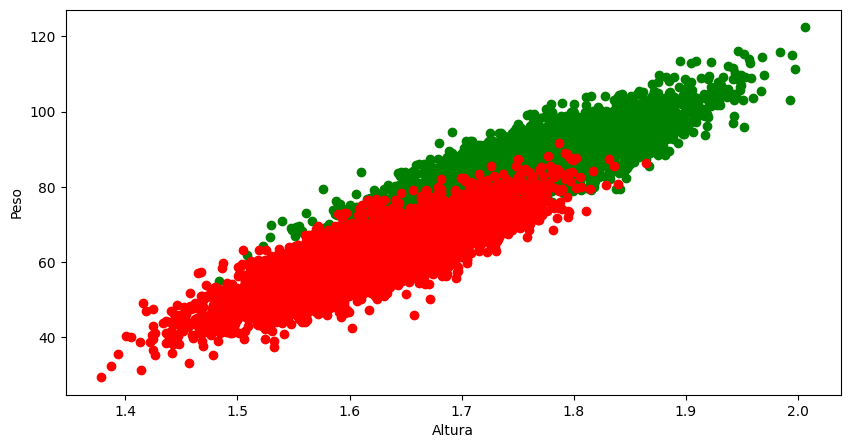

In [9]:
# Alumno graficar el peso (y) en función de la altura (x) pero para ambos sexos por separados
# Se debe realizar todo en un mismo "ax", cada scatter plot con diferente color para ver los dos grupos

masculinos = df2[df2['Sexo'] == "Masculino"]
femeninos = df2[df2['Sexo'] == "Femenino"]

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
ax.scatter(masculinos["Altura"], masculinos["Peso"], color= "Green", label="Masculinos")
ax.scatter(femeninos["Altura"], femeninos["Peso"], color= "Red", label="Femeninos")
ax.set_xlabel("Altura")
ax.set_ylabel("Peso")
plt.show()

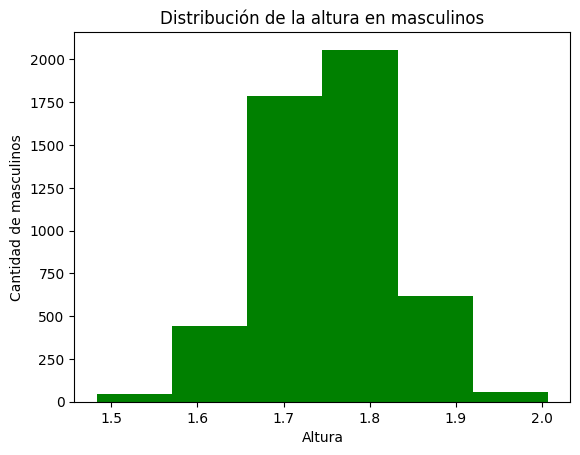

La altura promedio de los masculinos es de: 1.7532691860179221 metros


In [10]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio

plt.hist(masculinos['Altura'], bins=6, color="Green")
plt.xlabel('Altura')
plt.ylabel('Cantidad de masculinos')
plt.title('Distribución de la altura en masculinos')
plt.show()
altura_promedio_masculinos = masculinos["Altura"].mean()
print("La altura promedio de los masculinos es de:", altura_promedio_masculinos, "metros")


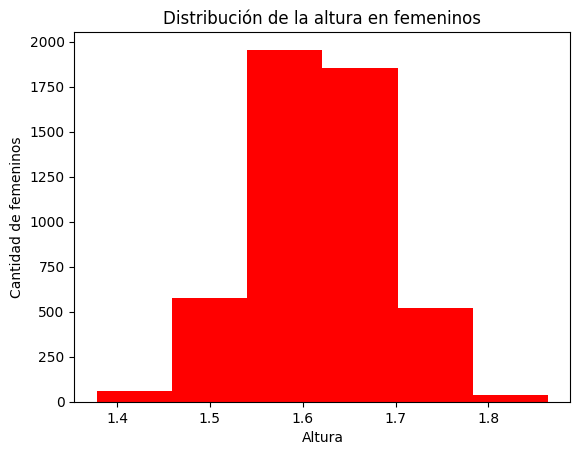

La altura promedio de los femeninos es de: 1.6182028495269967 metros


In [11]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio

plt.hist(femeninos['Altura'], bins=6, color="Red")
plt.xlabel('Altura')
plt.ylabel('Cantidad de femeninos')
plt.title('Distribución de la altura en femeninos')
plt.show()
altura_promedio_femeninos = femeninos["Altura"].mean()
print("La altura promedio de los femeninos es de:", altura_promedio_femeninos, "metros")

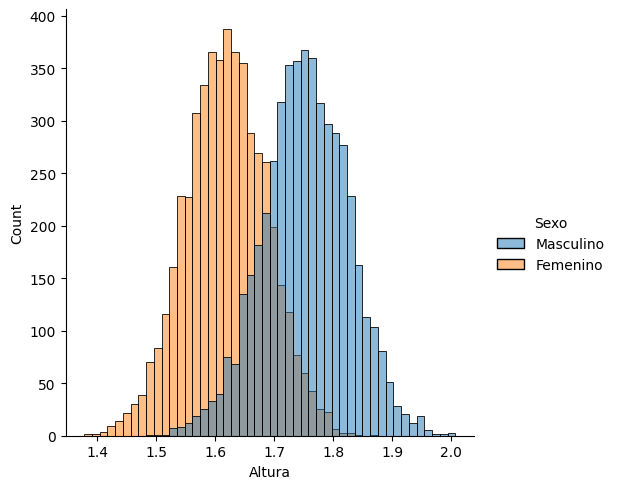

In [14]:
# Alumno: porque no prueba la función displot de seaborn que acepta
# "colorear" según la categoría deseada.
# Ingresar parámetros= data=df2, x="altura", hue="sexo"

sns.displot(data=df2, x="Altura", hue="Sexo")
plt.show()


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Alumno:<br>
Para esta regresión se utilizará como variable de entrada el peso (X) y como salida la altura (y). Crear el modelo de regresión lineal que sea de su agrado o invierta las variables de salida y entrada si así lo prefiere. Debe elegir trabajar con los datos de sexo masculino o femenino, o duplicar el trabajo y realizar ambos.<br>
Pasor a seguir:
- Obtener las variables X e y (para masculino y/o femenino)
- Dividir el dataset en train y test 70%30%
- Entrenar un modelo de regresión
- Calcular la métrica r2_score del modelo (y_hat vs y_test)
- Dibujar el resultado de la regresion sobre los datos de entrada


El modelo arroja un R2 socre de: 0.661463826053036


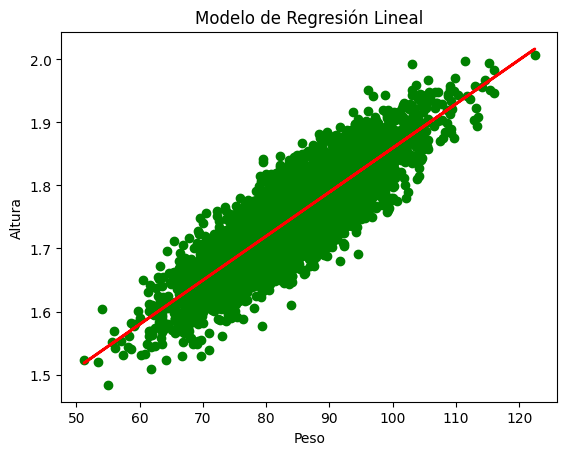

In [43]:
x = masculinos[["Peso"]].values
y = masculinos["Altura"].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)

from sklearn.metrics import r2_score

r2 = r2_score(y_hat, y_test)
print("El modelo arroja un R2 socre de:", r2)

plt.scatter(x, y, color="Green", label= "Datos de origen")
plt.plot(x, lr.predict(x), color= "Red", linewidth=2, label= "Regresión")
plt.xlabel("Peso")
plt.ylabel("Altura")
plt.title("Modelo de Regresión Lineal")
plt.show()




# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">